In [11]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("tweets.csv")
df = df.dropna()
df = df.drop("Unnamed: 0", axis = 1)
df

,Tweet
1,Because staff won't throw you out unless someo...
2,should've held that choke for another 20 secon...
3,a lot of these new 'redpill' guys on the scene...
4,"""if you believe in free speech, why do you ban..."
5,Hey @TeamYouTube one of my videos got flagged ...
...,...
263,a r u g u l a
264,"Today is a rough one, folks. I cannot tell you..."
265,"Hi @GonzaloLira1968, you haven't reached out t..."
266,The hardest choices require the strongest wills.


In [17]:
def get_polarity(tweet):
    blob = TextBlob(tweet)
    return blob.sentiment.polarity

In [18]:
df["Polarity"] = df["Tweet"].apply(get_polarity)
df

,Tweet,Polarity
1,Because staff won't throw you out unless someo...,-0.250000
2,should've held that choke for another 20 secon...,0.000000
3,a lot of these new 'redpill' guys on the scene...,-0.116234
4,"""if you believe in free speech, why do you ban...",0.400000
5,Hey @TeamYouTube one of my videos got flagged ...,0.080000
...,...,...
263,a r u g u l a,0.000000
264,"Today is a rough one, folks. I cannot tell you...",0.103125
265,"Hi @GonzaloLira1968, you haven't reached out t...",0.500000
266,The hardest choices require the strongest wills.,0.000000


In [19]:
def get_sentiment(polarity):
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

In [20]:
df["Sentiment"] = df["Polarity"].apply(get_sentiment)
df

,Tweet,Polarity,Sentiment
1,Because staff won't throw you out unless someo...,-0.250000,negative
2,should've held that choke for another 20 secon...,0.000000,neutral
3,a lot of these new 'redpill' guys on the scene...,-0.116234,negative
4,"""if you believe in free speech, why do you ban...",0.400000,positive
5,Hey @TeamYouTube one of my videos got flagged ...,0.080000,positive
...,...,...,...
263,a r u g u l a,0.000000,neutral
264,"Today is a rough one, folks. I cannot tell you...",0.103125,positive
265,"Hi @GonzaloLira1968, you haven't reached out t...",0.500000,positive
266,The hardest choices require the strongest wills.,0.000000,neutral


In [26]:
def get_words(tweet):
    blob = TextBlob(tweet)
    return len(blob.words)

In [27]:
df["Word Count"] = df["Tweet"].apply(get_words)
df

,Tweet,Polarity,Sentiment,Word Count
1,Because staff won't throw you out unless someo...,-0.250000,negative,46
2,should've held that choke for another 20 secon...,0.000000,neutral,12
3,a lot of these new 'redpill' guys on the scene...,-0.116234,negative,54
4,"""if you believe in free speech, why do you ban...",0.400000,positive,11
5,Hey @TeamYouTube one of my videos got flagged ...,0.080000,positive,53
...,...,...,...,...
263,a r u g u l a,0.000000,neutral,7
264,"Today is a rough one, folks. I cannot tell you...",0.103125,positive,28
265,"Hi @GonzaloLira1968, you haven't reached out t...",0.500000,positive,23
266,The hardest choices require the strongest wills.,0.000000,neutral,7


<AxesSubplot:xlabel='Polarity', ylabel='Count'>

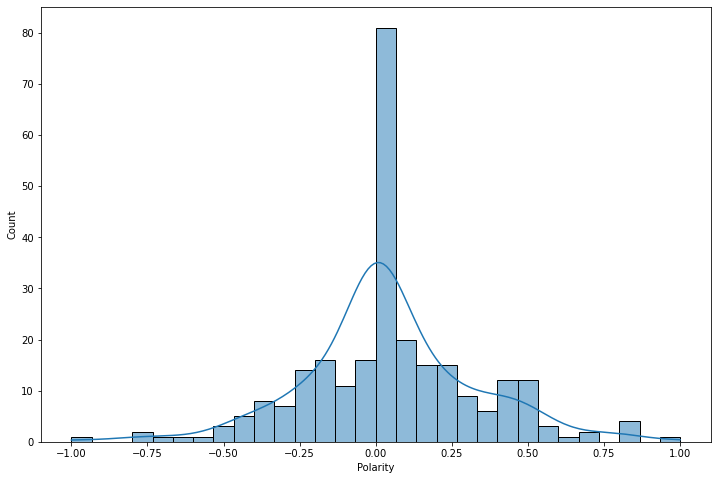

In [36]:
plt.figure(figsize = (12, 8))
sns.histplot(data = df, x = "Polarity", kde = True, bins = 30)

<AxesSubplot:xlabel='Word Count', ylabel='Count'>

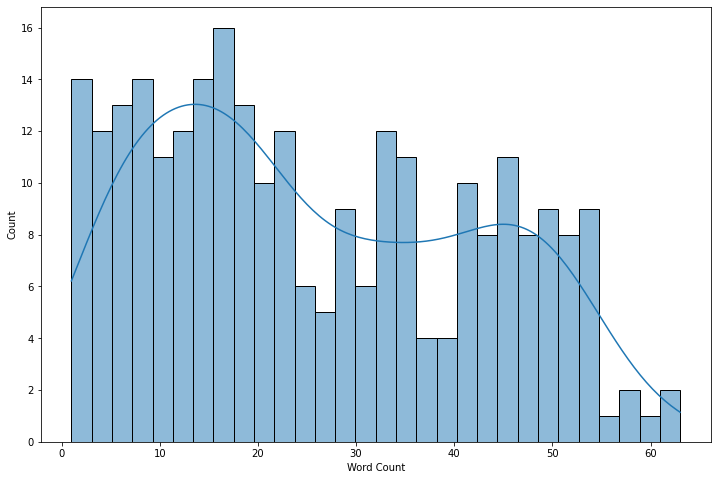

In [35]:
plt.figure(figsize = (12, 8))
sns.histplot(data = df, x = "Word Count", kde = True, bins = 30)

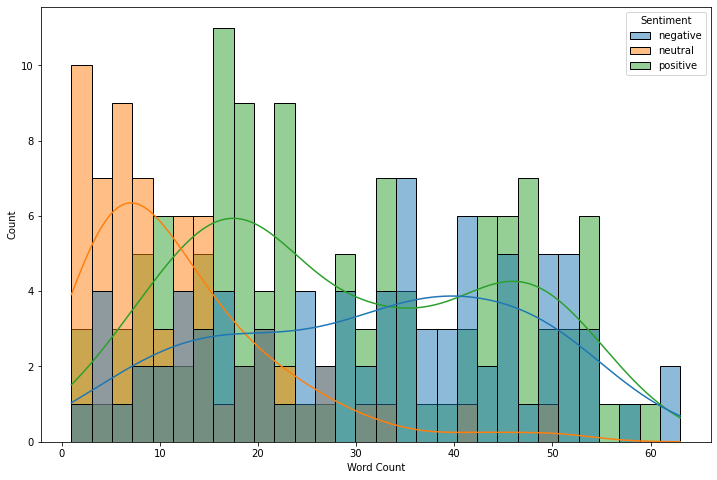

In [60]:
plt.figure(figsize = (12, 8))
sns.histplot(data = df, x = "Word Count", kde = True, hue = "Sentiment", bins = 30)
plt.savefig("hist_hue.jpg")

In [45]:
df.groupby("Sentiment").count().index

Index(['negative', 'neutral', 'positive'], dtype='object', name='Sentiment')

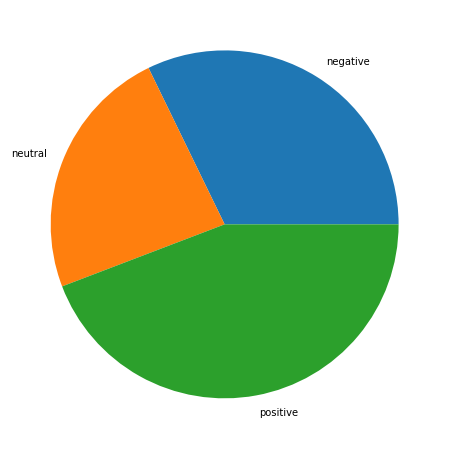

In [49]:
plt.figure(figsize = (12, 8))
plt.pie(df.groupby("Sentiment").count()["Tweet"], labels= df.groupby("Sentiment").count().index);
plt.savefig("pie.jpg")

<AxesSubplot:xlabel='Word Count', ylabel='Sentiment'>

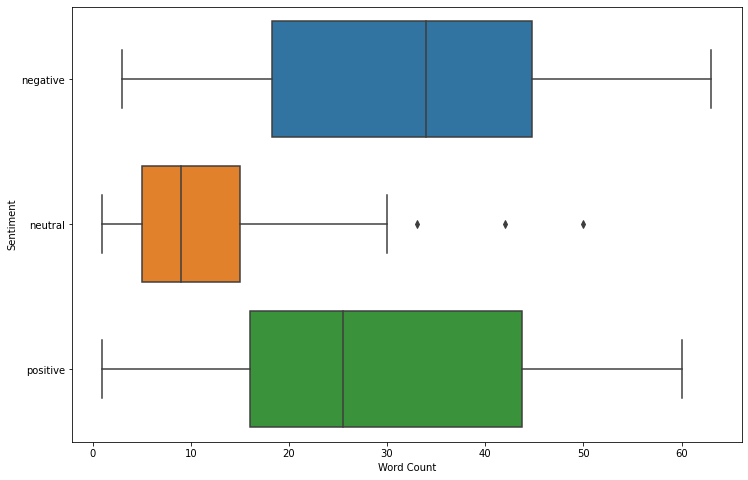

In [53]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = df, x = "Word Count", y = "Sentiment")

<AxesSubplot:xlabel='Word Count', ylabel='Polarity'>

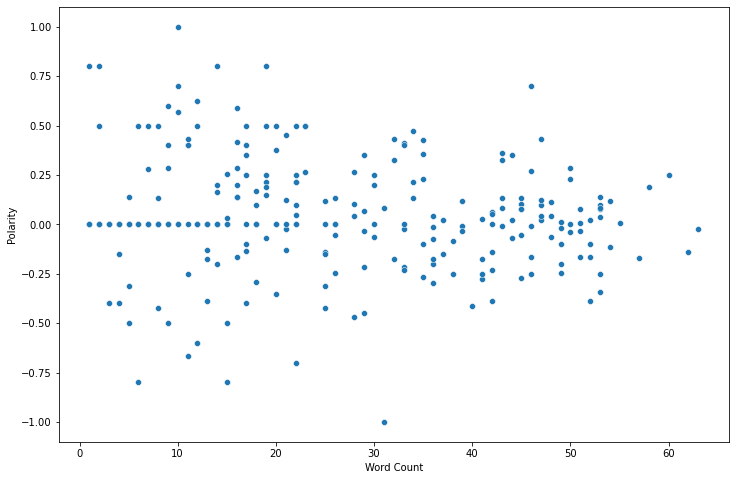

In [54]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = "Word Count", y = "Polarity")

<AxesSubplot:xlabel='Word Count', ylabel='Polarity'>

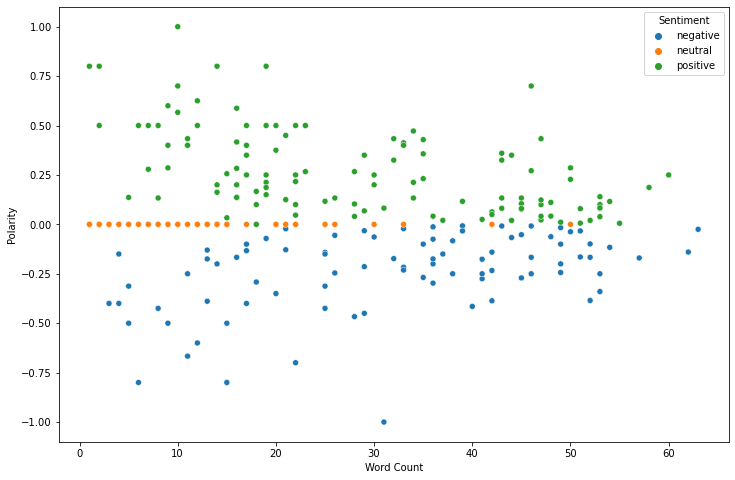

In [56]:
plt.figure(figsize = (12, 8))
sns.scatterplot(data = df, x = "Word Count", y = "Polarity", hue = "Sentiment")

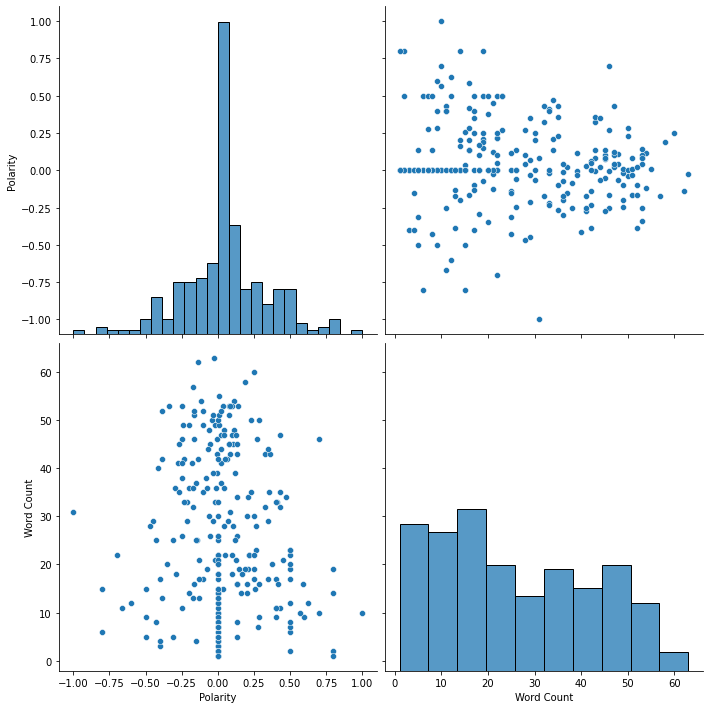

In [59]:
sns.pairplot(df, height = 5)